In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Import dataset

In [3]:
data_df = pd.read_csv("./data.csv")
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


### Data Imputation ( Missing Data Replacement)

In [5]:
data_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [14]:
for col in data_df.columns:
    missing_data = data_df[col].isna().sum()
    missing_percent = missing_data/len(data_df)*100
    print(f"Column: {col}: has {missing_percent}% missing data")

Column: Country: has 0.0% missing data
Column: Age: has 10.0% missing data
Column: Salary: has 10.0% missing data
Column: Purchased: has 0.0% missing data


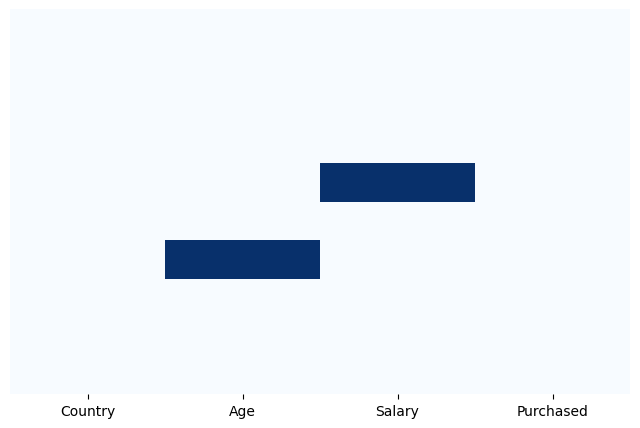

In [20]:
fig, ax = plt.subplots(figsize = (8,5))
sns.heatmap(data_df.isna(), cmap='Blues', cbar=False, yticklabels = False);

In [21]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [24]:
x = data_df.iloc[:, :-1].values # .values to convert data frame to numpy array
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [26]:
y = data_df.iloc[:, -1].values  # .values to convert data frame to numpy array
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [27]:
from sklearn.impute import SimpleImputer

# Create an instance of Class SimpleImputer: np.nan is empty value in the dataset
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')

imputer.fit(x[:, 1:3]) # Get two column numerical and calculate mean
x[:,1:3] = imputer.transform(x[:,1:3])

In [28]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

# Encode Categorical Data
### Encode Independent variable(X)

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x = ct.fit_transform(x)


In [30]:
x       #.  (France, Germany, Spain, Age , Salary)

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

### Encode Dependent Variable (y)

In [31]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [33]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

# Splitting the dataset(X = data, y = output) into the Training set and Test set

In [34]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [35]:
x_train

array([[1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object)

In [36]:
y_train

array([1, 0, 1, 0, 1, 1, 0, 0])

In [37]:
x_test

array([[0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0]], dtype=object)

In [38]:
y_test

array([0, 1])

### Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 3:] = sc.fit_transform(x_train[:, 3:])

In [40]:
x_train

array([[1.0, 0.0, 0.0, -0.7529426005471072, -0.6260377781240918],
       [1.0, 0.0, 0.0, 1.008453807952985, 1.0130429500553495],
       [1.0, 0.0, 0.0, 1.7912966561752484, 1.8325833141450703],
       [0.0, 1.0, 0.0, -1.7314961608249362, -1.0943465576039322],
       [1.0, 0.0, 0.0, -0.3615211764359756, 0.42765697570554906],
       [0.0, 1.0, 0.0, 0.22561095973072184, 0.05040823668012247],
       [0.0, 0.0, 1.0, -0.16581046438040975, -0.27480619351421154],
       [0.0, 0.0, 1.0, -0.013591021670525094, -1.3285009473438525]],
      dtype=object)

In [41]:
x_test[:, 3:] = sc.transform(x_test[:,3:])

In [42]:
x_test

array([[0.0, 1.0, 0.0, 2.1827180802863797, 2.3008920936249107],
       [0.0, 0.0, 1.0, -2.3186282969916334, -1.7968097268236927]],
      dtype=object)